## 6 Практическое занятие по градиентному бустингу

**Градиентный бустинг (Gradient Boosting)** — метод ансамблевого обучения, где модели обучаются **последовательно**, каждая следующая модель исправляет ошибки предыдущей. Новая модель обучается предсказывать **остатки (residuals)** предыдущей модели.

**Бустинг vs Баггинг:**
- **Баgging (Random Forest):** Обучаем N моделей **параллельно** на разных подвыборках → усреднение → снижение variance
- **Boosting:** Обучаем N моделей **последовательно**, каждая фокусируется на ошибках предыдущей → снижение bias

**Residuals (остатки)** — разница между реальным значением и предсказанием модели. Формула: `residual = y_true - y_pred`. Каждое новое дерево в бустинге предсказывает residuals предыдущего.

**Loss Function (функция потерь)** — метрика, которую модель минимизирует. Для классификации: log loss (cross-entropy), для регрессии: MSE, MAE, Huber loss.

**Learning Rate (скорость обучения, η)** — коэффициент, на который умножается вклад каждого нового дерева. Формула финального предсказания: `y_pred = tree₁ + η×tree₂ + η×tree₃ + ...`. Малый η (0.01-0.1) требует больше деревьев, но даёт лучше обобщение. Большой η (0.5-1.0) быстрее обучается, но рискует переобучением.

**Early Stopping** — остановка обучения, когда метрика на валидации перестаёт улучшаться. Предотвращает переобучение.

**XGBoost (eXtreme Gradient Boosting)** — оптимизированная реализация градиентного бустинга от Tianqi Chen (2016). Фичи: регуляризация (L1/L2), параллельное обучение, обработка пропусков, built-in cross-validation. Доминирует в Kaggle с 2015 года.

**LightGBM (Light Gradient Boosting Machine)** — библиотека от Microsoft (2017). Отличие: **leaf-wise рост деревьев** (выбирает лист с max loss для разбиения) вместо level-wise (по уровням). Результат: быстрее обучается, меньше памяти, лучше на больших датасетах (>10k строк).

**CatBoost (Categorical Boosting)** — библиотека от Yandex (2017). Фичи: **автоматическая обработка категориальных признаков** (не нужно one-hot encoding), ordered boosting (борьба с prediction shift), symmetric trees. Лучше работает с категориями.

**Гиперпараметры бустинга:**
- **n_estimators** (num_boost_round) — количество деревьев в ансамбле
- **learning_rate** (eta, η) — скорость обучения (0.01-0.3)
- **max_depth** — максимальная глубина одного дерева (3-10)
- **min_child_weight** — минимальная сумма весов в листе (регуляризация)
- **subsample** — доля объектов для обучения каждого дерева (0.5-1.0)
- **colsample_bytree** — доля признаков для каждого дерева (0.5-1.0)
- **reg_lambda** (L2) — коэффициент L2-регуляризации весов
- **reg_alpha** (L1) — коэффициент L1-регуляризации весов

**Правило для параметров:**
- Базовая конфигурация: `learning_rate=0.1, max_depth=6, n_estimators=100`
- Для финальной модели: `learning_rate=0.01, max_depth=3-5, n_estimators=1000+, early_stopping`

In [2]:
!pip install xgboost lightgbm catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 101.7/101.7 MB 480.3 kB/s  0:03:28



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 100.2/100.2 MB 255.9 kB/s  0:03:53
   ---------------------------------------- 8.1/8.1 MB 333.0 kB/s  0:00:24
   ---------------------------------------- 2.3/2.3 MB 277.7 kB/s  0:00:08
   ---------------------------------------- 9.9/9.9 MB 311.8 kB/s  0:00:32



In [8]:
# Проверка версий:
!python -c "import xgboost; print('XGBoost:', xgboost.__version__)"
!python -c "import lightgbm; print('LightGBM:', lightgbm.__version__)"
!python -c "import catboost; print('CatBoost:', catboost.__version__)"

XGBoost: 3.2.0
LightGBM: 4.6.0
CatBoost: 1.2.10


In [2]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import sys
!{sys.executable} -m pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [9]:
!{sys.executable} -m pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\python\python36\python.exe' 'c:\python\python36\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\dikov\AppData\Local\Temp\pip-build-env-rr6__rmh\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple --extra-index-url https://pypi.ngc.nvidia.com --trusted-host pypi.ngc.nvidia.com -- 'setuptools (>=70.1.0, <83.0)' 'cmake (>=3.24, <4.0)' 'jupyterlab (>=3.0.6, <3.6.0)' 'conan (>=2.4.1, <3.0)' 'cython ~= 3.0.10' 'numpy < 3.0'
       cwd: None
  Complete output (6 lines):
  Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com, https://pypi.ngc.nvidia.com
  ERROR: Could not find a version that satisfies the requirement setuptools<83.0,>=70.1.0 (from versions: 0.6b1, 0.6b2, 0.6b3, 0.6b4, 0.6rc1, 0.6rc2, 0.6rc3, 0.6rc4, 0.6rc5, 0.6rc6, 0.6rc7, 0.6rc8, 0.6rc9, 0.6rc10, 0.6rc11, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.6, 0.7.7, 0.7.8, 0.8, 0.9,

In [5]:
import xgboost

**Важные замечания по версиям:**
- XGBoost <1.0: параметр `use_label_encoder=False` вызывает warning (можно игнорировать)
- LightGBM <3.0: другие названия параметров (`num_leaves` вместо `max_leaves`)
- CatBoost: по умолчанию verbose=True (много вывода) → используйте `verbose=False` или `verbose=100`

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
import lightgbm as lgb
#from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier

sns.set_theme(style="whitegrid", palette="Set2", font_scale=1.1)




In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Dikovitsky-Vladimir/Edu/main/cs-training.csv')

In [14]:
df = df.drop('Unnamed: 0', axis=1)  # Удаляем индексный столбец
df = df.dropna()  # Обработка пропусков

In [17]:
df.head()
df.info()

print("\n=== ДИСБАЛАНС КЛАССОВ ===")
print(df['SeriousDlqin2yrs'].value_counts())
print(f"Процент дефолтов: {df['SeriousDlqin2yrs'].mean()*100:.1f}%")

print("\nЭто типичный дисбаланс в кредитном скоринге: 93% вернут, 7% не вернут.")
print("Accuracy = 93% (всегда предсказываем 0) — бесполезная модель!")
print("Нужны метрики: ROC-AUC, precision/recall для класса 1.")

# Статистика
print("\n=== СТАТИСТИКА ПРИЗНАКОВ ===")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 4   DebtRatio                             120269 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 7   NumberOfTimes90DaysLate               120269 non-null  int64  
 8   NumberRealEstateLoansOrLines          120269 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 10  NumberOfDependents                    120269 non-null  float64
dtype

In [ ]:
Целевая переменная (Target):
SeriousDlqin2yrs — это именно то, что мы хотим предсказать.
1 — у человека была серьезная просрочка (более 90 дней) в течение последних 2 лет (плохой заемщик).
0 — серьезных просрочек не было (надежный заемщик).
Описание остальных полей (Признаки / Features):
Вот что означают эти колонки «человеческим» языком:
RevolvingUtilizationOfUnsecuredLines: Процент использования кредитного лимита. Сколько денег человек тратит по картам относительно общего лимита. (Если число 
, значит, человек ушел в «перелимит»).
age: Возраст заемщика в годах.
NumberOfTime30-59DaysPastDueNotWorse: Сколько раз за последние 2 года у человека была небольшая просрочка (от 30 до 59 дней).
DebtRatio: Коэффициент задолженности. Отношение ежемесячных платежей по долгам и налогам к общему доходу. (Например, 0.35 означает, что 35% дохода уходит на долги).
MonthlyIncome: Ежемесячный доход заемщика.
NumberOfOpenCreditLinesAndLoans: Количество открытых кредитов (потребительских, автокредитов) и кредитных карт.
NumberOfTimes90DaysLate: Самый критичный показатель — сколько раз заемщик допускал просрочку на 90 дней и более.
NumberRealEstateLoansOrLines: Количество ипотечных кредитов или кредитных линий под залог недвижимости.
NumberOfTime60-89DaysPastDueNotWorse: Сколько раз была средняя просрочка (от 60 до 89 дней) за последние 2 года.
NumberOfDependents: Количество иждивенцев в семье (дети, супруг/супруга на содержании и т.д.).


In [19]:
# Для бустинга нужна ВАЛИДАЦИОННАЯ выборка (для early stopping)
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# TODO: разделите на train/temp (80/20), затем temp на validation/test (50/50)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"Train:      {X_train.shape[0]} samples ({y_train.mean()*100:.1f}% дефолтов)")
print(f"Validation: {X_val.shape[0]} samples ({y_val.mean()*100:.1f}% дефолтов)")
print(f"Test:       {X_test.shape[0]} samples ({y_test.mean()*100:.1f}% дефолтов)")

print("Зачем три выборки?")
print("Train: обучение модели")
print("Validation: early stopping (останавливаем, когда метрика перестаёт расти)")
print("Test: финальная оценка (модель НИКОГДА не видела эти данные)")

Train:      96215 samples (6.9% дефолтов)
Validation: 12027 samples (7.0% дефолтов)
Test:       12027 samples (6.9% дефолтов)
Зачем три выборки?
Train: обучение модели
Validation: early stopping (останавливаем, когда метрика перестаёт расти)
Test: финальная оценка (модель НИКОГДА не видела эти данные)


In [20]:
# Обучаем Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Метрики
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest (100 деревьев, max_depth=10):")
print(f"  Accuracy: {acc_rf:.4f}")
print(f"  ROC-AUC:  {roc_auc_rf:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Вернёт', 'Дефолт']))

Random Forest (100 деревьев, max_depth=10):
  Accuracy: 0.9327
  ROC-AUC:  0.8425

Classification Report:
              precision    recall  f1-score   support

      Вернёт       0.94      0.99      0.96     11192
      Дефолт       0.55      0.16      0.25       835

    accuracy                           0.93     12027
   macro avg       0.75      0.57      0.61     12027
weighted avg       0.91      0.93      0.91     12027



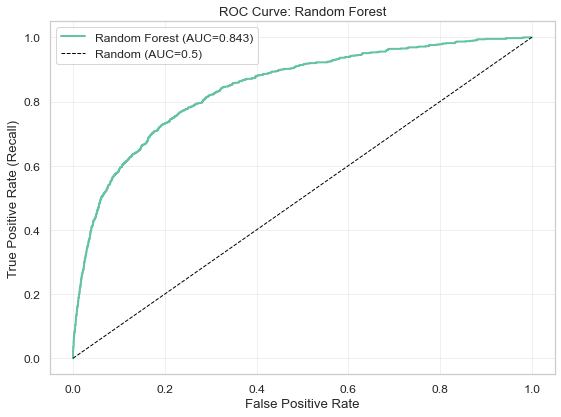

In [21]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, linewidth=2, label=f'Random Forest (AUC={roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUC=0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve: Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
# XGBoost с дефолтными параметрами
xgb_default = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_default.fit(X_train, y_train)

y_pred_xgb = xgb_default.predict(X_test)
y_proba_xgb = xgb_default.predict_proba(X_test)[:, 1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("XGBoost (дефолтные параметры):")
print(f"  Accuracy: {acc_xgb:.4f}")
print(f"  ROC-AUC:  {roc_auc_xgb:.4f}")
print(f"\nУлучшение vs Random Forest: {(roc_auc_xgb - roc_auc_rf)*100:+.1f} п.п.")

XGBoost (дефолтные параметры):
  Accuracy: 0.9322
  ROC-AUC:  0.8414

Улучшение vs Random Forest: -0.1 п.п.


In [23]:
# XGBoost с early stopping на validation
xgb_model = xgb.XGBClassifier(
    n_estimators=1000,        # Много деревьев (early stopping остановит раньше)
    learning_rate=0.1,        # Скорость обучения
    max_depth=5,              # Глубина одного дерева
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'         # Метрика для early stopping
)

# Обучение с early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],           # Validation для мониторинга
    early_stopping_rounds=50,             # Остановка после 50 итераций без улучшения
    verbose=50                            # Вывод каждые 50 итераций
)

# Предсказания
y_pred_xgb_es = xgb_model.predict(X_test)
y_proba_xgb_es = xgb_model.predict_proba(X_test)[:, 1]

acc_xgb_es = accuracy_score(y_test, y_pred_xgb_es)
roc_auc_xgb_es = roc_auc_score(y_test, y_proba_xgb_es)

print(f"\nXGBoost с early stopping:")
print(f"  Остановился на итерации: {xgb_model.best_iteration}")
print(f"  Best validation AUC: {xgb_model.best_score:.4f}")
print(f"  Test Accuracy: {acc_xgb_es:.4f}")
print(f"  Test ROC-AUC:  {roc_auc_xgb_es:.4f}")

[0]	validation_0-auc:0.83655
[50]	validation_0-auc:0.85242
[100]	validation_0-auc:0.85481
[150]	validation_0-auc:0.85467
[154]	validation_0-auc:0.85450

XGBoost с early stopping:
  Остановился на итерации: 104
  Best validation AUC: 0.8549
  Test Accuracy: 0.9336
  Test ROC-AUC:  0.8455


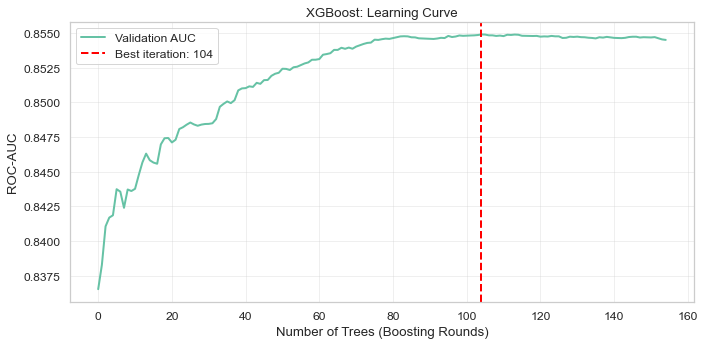

Наблюдение: AUC монотонно растёт, затем стабилизируется.
Early stopping остановил на итерации, где начался plateau.


In [24]:
# Извлечём историю обучения
results = xgb_model.evals_result()
train_auc = results['validation_0']['auc']
epochs = range(len(train_auc))

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_auc, linewidth=2, label='Validation AUC')
plt.axvline(xgb_model.best_iteration, color='red', linestyle='--', 
            linewidth=2, label=f'Best iteration: {xgb_model.best_iteration}')
plt.xlabel('Number of Trees (Boosting Rounds)')
plt.ylabel('ROC-AUC')
plt.title('XGBoost: Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Наблюдение: AUC монотонно растёт, затем стабилизируется.")
print("Early stopping остановил на итерации, где начался plateau.")

 learning_rate  best_iteration  test_auc
          0.01             990  0.844910
          0.05             281  0.845212
          0.10             104  0.845546
          0.30              40  0.845377


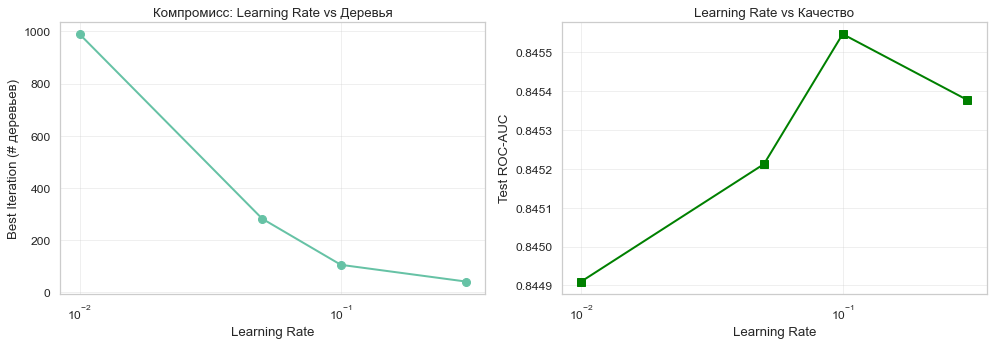

Вывод:
• lr=0.01: много деревьев (~500-800), максимальный AUC
• lr=0.1:  средне (~150-250), хороший баланс
• lr=0.3:  мало деревьев (~50-100), риск недообучения


In [25]:
# Как learning_rate влияет на количество нужных деревьев?
learning_rates = [0.01, 0.05, 0.1, 0.3]
results_lr = []

for lr in learning_rates:
    model = xgb.XGBClassifier(
        n_estimators=1000,
        learning_rate=lr,
        max_depth=5,
        random_state=42,
        use_label_encoder=False,
        eval_metric='auc'
    )
    
    model.fit(X_train, y_train, 
              eval_set=[(X_val, y_val)],
              early_stopping_rounds=50,
              verbose=0)  # Без вывода
    
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    
    results_lr.append({
        'learning_rate': lr,
        'best_iteration': model.best_iteration,
        'test_auc': auc
    })

results_lr_df = pd.DataFrame(results_lr)
print(results_lr_df.to_string(index=False))

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(results_lr_df['learning_rate'], results_lr_df['best_iteration'], 'o-', linewidth=2, markersize=8)
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Best Iteration (# деревьев)')
axes[0].set_title('Компромисс: Learning Rate vs Деревья')
axes[0].set_xscale('log')
axes[0].grid(True, alpha=0.3)

axes[1].plot(results_lr_df['learning_rate'], results_lr_df['test_auc'], 's-', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('Test ROC-AUC')
axes[1].set_title('Learning Rate vs Качество')
axes[1].set_xscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Вывод:")
print("• lr=0.01: много деревьев (~500-800), максимальный AUC")
print("• lr=0.1:  средне (~150-250), хороший баланс")
print("• lr=0.3:  мало деревьев (~50-100), риск недообучения")